In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

dir = "/content/drive/MyDrive/Tugas_Akhir/dataset"

Mounted at /content/drive/


Total Files : 1398


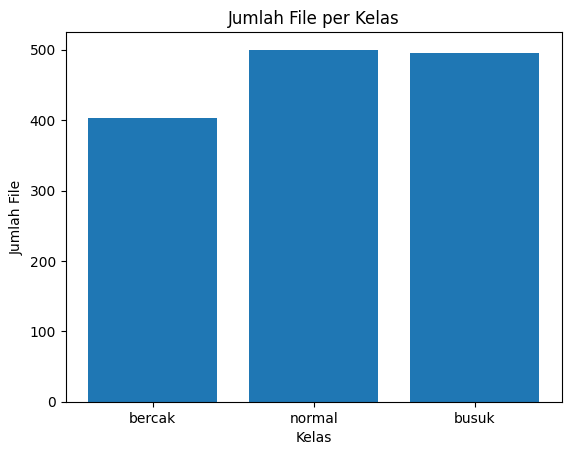

In [ ]:
# Visualisasi jumlah gambar tiap kelas
import matplotlib.pyplot as plt
import os

label = {}
total_files = 0
for i in os.listdir(dir):
    counting = len(os.listdir(os.path.join(dir, i)))
    label[i] = counting
    total_files += counting

print("Total Files : " + str(total_files))

plt.bar(label.keys(), label.values());
plt.title("Jumlah File per Kelas");
plt.xlabel('Kelas');
plt.ylabel('Jumlah File');

In [ ]:
import tensorflow as tf

data = tf.keras.preprocessing.image.ImageDataGenerator(
    validation_split=0.3
)

In [ ]:
image_size = (200,200)
batch_size = 32
seed = 999

train_data = data.flow_from_directory(
    dir,
    class_mode='categorical',
    subset='training',
    target_size=image_size,
    batch_size=batch_size,
    seed=seed
)

valid_data = data.flow_from_directory(
    dir,
    class_mode='categorical',
    subset='validation',
    target_size=image_size,
    batch_size=batch_size,
    seed=seed
)

Found 980 images belonging to 3 classes.
Found 418 images belonging to 3 classes.


In [ ]:
data_augmentation = tf.keras.Sequential(
  [
    tf.keras.layers.RandomZoom(0.1),
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.Rescaling(1./255)
  ]
)



In [ ]:
augmentation = tf.keras.models.Sequential(data_augmentation)

# **Modeling**

Skenario 17 (optimizer adam, epoch : 10, learning rate : 0.0001)

In [ ]:
base_model = tf.keras.applications.DenseNet201(include_top=False,
                                                        weights='imagenet',
                                                        input_shape=(image_size[0], image_size[1], 3),
                                                        pooling='max')
base_model.trainable=False
train_data.preprocessing_function = tf.keras.applications.densenet.preprocess_input

74836368/74836368 [==============================] - 0s 0us/step


In [ ]:
densenet_model_17 = tf.keras.models.Sequential([
  data_augmentation,
  base_model,
  tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
model_skenario_16 = densenet_mode
densenet_model_16.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    metrics=['accuracy']
  )

In [ ]:
model_hist_16 = densenet_model_16.fit(
    train_data,
    epochs=10,
    validation_data = valid_data
)

Epoch 1/10
31/31 [==============================] - 674s 21s/step - loss: 1.3889 - accuracy: 0.4510 - val_loss: 1.0357 - val_accuracy: 0.6124
Epoch 2/10
31/31 [==============================] - 437s 14s/step - loss: 1.0620 - accuracy: 0.5694 - val_loss: 0.8361 - val_accuracy: 0.6411
Epoch 3/10
31/31 [==============================] - 442s 14s/step - loss: 0.8977 - accuracy: 0.6429 - val_loss: 0.7161 - val_accuracy: 0.6914
Epoch 4/10
31/31 [==============================] - 439s 14s/step - loss: 0.7803 - accuracy: 0.6837 - val_loss: 0.6242 - val_accuracy: 0.7368
Epoch 5/10
31/31 [==============================] - 417s 13s/step - loss: 0.6798 - accuracy: 0.7010 - val_loss: 0.5561 - val_accuracy: 0.7584
Epoch 6/10
31/31 [==============================] - 419s 13s/step - loss: 0.6077 - accuracy: 0.7439 - val_loss: 0.4971 - val_accuracy: 0.7823
Epoch 7/10
31/31 [==============================] - 427s 14s/step - loss: 0.5720 - accuracy: 0.7612 - val_loss: 0.4621 - val_accuracy: 0.7967
Epoch 

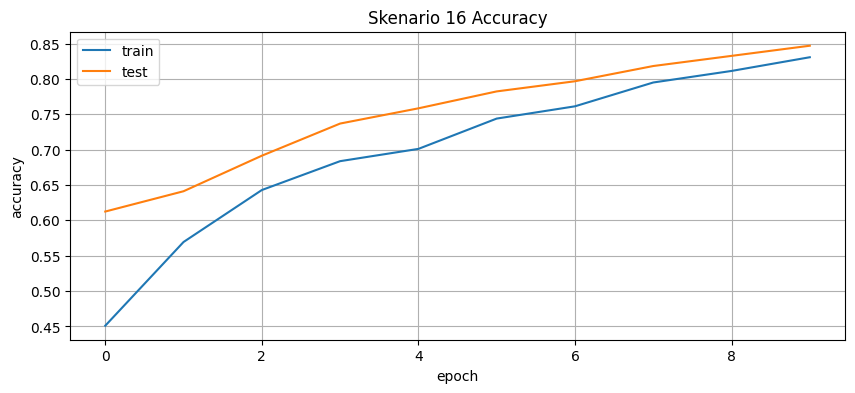

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(model_hist_17.history['accuracy'])
plt.plot(model_hist_17.history['val_accuracy'])
plt.title('Skenario 16 Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()

print()

skenario 4 (optimizer : RMSprop, Epoch : 5, learning rate : 0.0001)

In [ ]:
model_skenario_17 = densenet_model
model_skenario_17.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001),
    metrics=['accuracy']
  )

In [ ]:
model_hist_17 = model_skenario_17.fit(
    train_data,
    epochs=10,
    validation_data = valid_data
)

Epoch 1/10
31/31 [==============================] - 455s 14s/step - loss: 1.4381 - accuracy: 0.4051 - val_loss: 1.1278 - val_accuracy: 0.5407
Epoch 2/10
31/31 [==============================] - 431s 14s/step - loss: 1.1070 - accuracy: 0.5378 - val_loss: 0.8483 - val_accuracy: 0.6483
Epoch 3/10
31/31 [==============================] - 411s 13s/step - loss: 0.9324 - accuracy: 0.6010 - val_loss: 0.6701 - val_accuracy: 0.7129
Epoch 4/10
31/31 [==============================] - 438s 14s/step - loss: 0.7639 - accuracy: 0.6776 - val_loss: 0.5781 - val_accuracy: 0.7608
Epoch 5/10
31/31 [==============================] - 431s 14s/step - loss: 0.6283 - accuracy: 0.7398 - val_loss: 0.5057 - val_accuracy: 0.7967
Epoch 6/10
31/31 [==============================] - 407s 13s/step - loss: 0.5640 - accuracy: 0.7724 - val_loss: 0.4543 - val_accuracy: 0.8134
Epoch 7/10
31/31 [==============================] - 432s 14s/step - loss: 0.5384 - accuracy: 0.7969 - val_loss: 0.4175 - val_accuracy: 0.8301
Epoch 

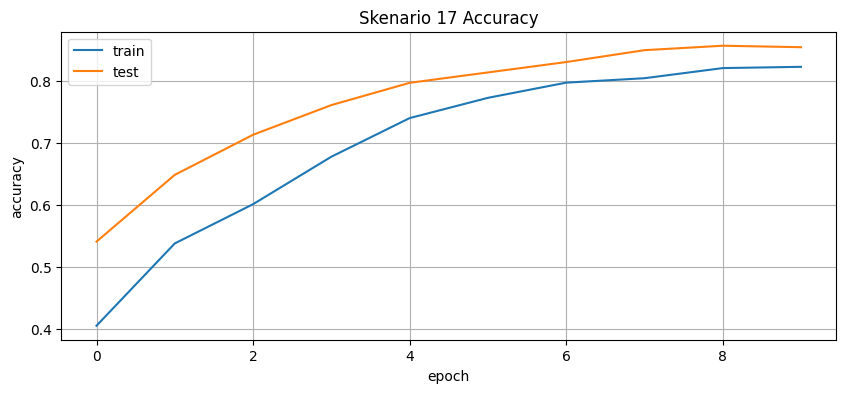

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(model_hist_18.history['accuracy'])
plt.plot(model_hist_18.history['val_accuracy'])
plt.title('Skenario 17 Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()

print()

skenario 19 (optimizer : RMSprop, Epoch : 5, learning rate : 0.0001)

In [ ]:
model_skenario_18 = model_skenario_19

In [ ]:
model_skenario_19 = tf.keras.models.Sequential([
  data_augmentation,
  base_model,
  tf.keras.layers.Dense(3, activation='softmax')
])


model_skenario_18.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.0001),
    metrics=['accuracy']
  )

In [ ]:
model_hist_18 = model_skenario_18.fit(
    train_data,
    epochs=10,
    validation_data = valid_data
)

Epoch 1/10
31/31 [==============================] - 451s 14s/step - loss: 1.6388 - accuracy: 0.3806 - val_loss: 1.5166 - val_accuracy: 0.3708
Epoch 2/10
31/31 [==============================] - 423s 14s/step - loss: 1.3979 - accuracy: 0.4429 - val_loss: 1.3574 - val_accuracy: 0.4450
Epoch 3/10
31/31 [==============================] - 428s 14s/step - loss: 1.2700 - accuracy: 0.4816 - val_loss: 1.1985 - val_accuracy: 0.5167
Epoch 4/10
31/31 [==============================] - 427s 14s/step - loss: 1.1598 - accuracy: 0.5510 - val_loss: 1.0889 - val_accuracy: 0.5359
Epoch 5/10
31/31 [==============================] - 428s 14s/step - loss: 1.0650 - accuracy: 0.5786 - val_loss: 1.0302 - val_accuracy: 0.5622
Epoch 6/10
31/31 [==============================] - 427s 14s/step - loss: 0.9471 - accuracy: 0.6092 - val_loss: 0.9468 - val_accuracy: 0.5909
Epoch 7/10
31/31 [==============================] - 427s 14s/step - loss: 0.9074 - accuracy: 0.6418 - val_loss: 0.8878 - val_accuracy: 0.6100
Epoch 

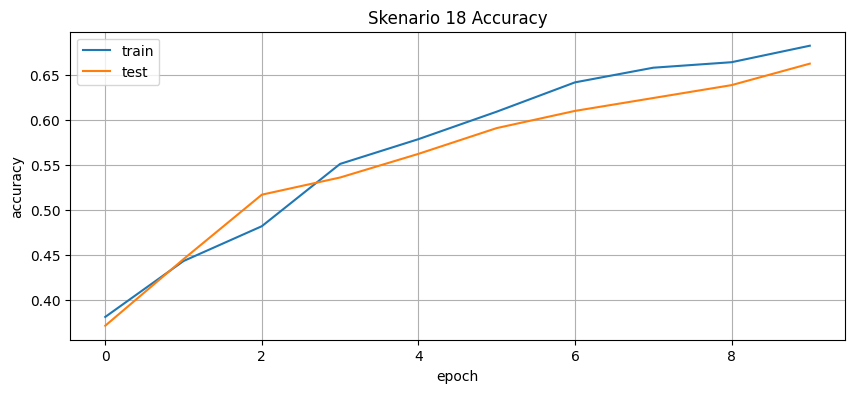

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(model_hist_19.history['accuracy'])
plt.plot(model_hist_19.history['val_accuracy'])
plt.title('Skenario 18 Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()

print()